# Creating a DNAseI footprint profile

```{note}
This exercise is *optional*!
```


## Description

The exercise for this week is to write a **script** that plots the cumulative footprint signal in motif sequences. 
The script is given two input filenames as arguments on the command line:

* motif locations in BED format;
* DNAseI sequencing data in indexed BAM format.

The script needs to find all reads overlapping the motif region, 
extended with a certain length, 
and take the start position of the reads.
It will plot all read start positions, the DNAseI cutting sites, 
averaged over all motif locations.
The result should look something like this:

![An example of a CTCF footprint profile.](img/CTCF.Fetal_Brain.png)

### Data

The motif matches for three transcription factors in DNAseI hotspots are located in `/scratch/cfb/footprints/`:

* `/scratch/cfb/footprints/CTCF_motifs.bed`
* `/scratch/cfb/footprints/NRF1_motifs.bed`
* `/scratch/cfb/footprints/REST_motifs.bed`

We have DNAseI sequencing data in BAM format for two different tissues (fetal heart and brain):

* `/scratch/cfb/regmod/dnase/bam/UW.Fetal_Brain.ChromatinAccessibility.merged.bam`
* `/scratch/cfb/regmod/dnase/bam/UW.Fetal_Heart.ChromatinAccessibility.merged.bam`

### Reading BAM files

To read BAM files, you will use the Python `pysam` module, 
see the documentation [here](http://pysam.readthedocs.org/).
Let's say you have a `BAM` (indexed!) file called `example.bam`. 
Here is how to open it with `pysam`:

In [4]:
%cd ../data/footprint/

[Errno 2] No such file or directory: '../data/footprint/'
/mnt/c/Users/simon/Documents/git/cfb_book/data/footprint


In [10]:
import pysam
samfile = pysam.AlignmentFile("example.bam",  "rb")

You can now retrieve reads mapping to a specific location with the `fetch` method, 
which returns an iterator.

In [18]:
for read in samfile.fetch("chr6", 170862000, 170862010):
    print(read.qname, read.reference_name, read.reference_start)

SOLEXA-1GA-1:7:72:651:1250#0 chr6 170861983
SOLEXA-1GA-1:2:66:175:1257#0 chr6 170861983
SOLEXA-1GA-1:4:11:575:1503#0 chr6 170861983
SOLEXA-1GA-2:2:95:69:974#0 chr6 170861991
SOLEXA-1GA-2_2_FC30DG6::5:100:373:1401 chr6 170861993
SOLEXA-1GA-1:2:3:22:793:1306 chr6 170861994
SOLEXA-1GA-2_2_FC30DG6::3:85:1736:96 chr6 170861997
SOLEXA-1GA-2_2_FC30DG6::6:45:1406:1983 chr6 170862000
SOLEXA-1GA-2_2_FC30DG6::5:28:437:474 chr6 170862001
SOLEXA-1GA-1:4:2:416:1943#0 chr6 170862002
SOLEXA-1GA-1:2:5:2:293:1943 chr6 170862006
SOLEXA-1GA-1:2:2:40:1247:887 chr6 170862007
SOLEXA-1GA-2:5:1:790:886#0 chr6 170862008


See the attributes of the read, an `AlignedSegment` object, [here](http://pysam.readthedocs.org/en/latest/api.html#pysam.AlignedSegment).

### Creating the profile

You can use a `list` to store the profile. 

In [21]:
profile = [0] * 10
profile[1] += 1
profile[8] += 2

for i in range(4,8):
    profile[i] += 3

print(profile)

[0, 1, 0, 0, 3, 3, 3, 3, 2, 0]


### Plotting

Here is an example how to make a line plot using `pandas`:


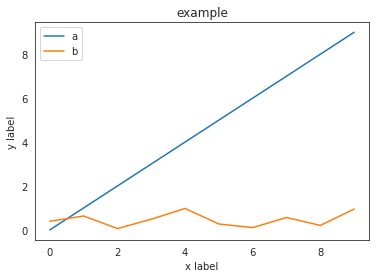

In [22]:
# This line is only necessary in Jupyter notebook, not in a script
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('white')  # I like this better 

df = pd.DataFrame({"a": range(10), "b": np.random.rand(10)})

# plot using pandas
df.plot(title="example")

# customize plot
plt.xlabel("x label")
plt.ylabel("y label")

# save figure as png (many other formats also possible)
plt.savefig("myplot.png")

In [23]:
import os
if os.path.exists("myplot.png"):
    os.unlink("myplot.png")

### Approach

Keep the following things in mind:

* Think about the problem first, before starting to program.
* Write out the logic of the problem.
* Start out small.
* Think of test sets and create them.
* The BAM files are big! Testing your script on a complete dataset will take too much time. **Don't copy the whole file to your own directory!**
  Create a small test file with few motifs to develop and test your script. What would be a reasonably number? 1? 2? 10? 100? 1000?
* The score of the motif match (higher means a better match) is represented in the 5th column of the BED file.

#### Tricky issues:

1. Motif orientation. A motif can be located on the forward or reverse strand (column 6 in the BED file). Start with only forward motifs, and once that works, add the reverse motifs.
2. Read orientation. The start position of the reverse reads is not represented in the `pos` attribute. 
   Start with only the reads mapped to the forward strand.

### Testing

You can use CTCF and/or NRF1 data to test your script and compare your result to published examples.
See [Fig. 5](http://genome.cshlp.org/content/21/3/456/F5.expansion.html) of [Boyle et al. 2012](https://dx.doi.org/10.1101/gr.112656.110) for CTCF and [Fig. 3](http://www.nature.com/nature/journal/v489/n7414/fig_tab/nature11212_F3.html) of [Neph et al. 2012](https://dx.doi.org/10.1038/nature11212) for NRF1.

### Final exercise

Create the footprint profile of REST (RE1-Silencing Transcription factor), also known as Neuron-Restrictive Silencer Factor (NRSF), 
in both heart and brain fetal tissues. 
Compare the resuls and check the literature for REST function.
Can you explain the result?